In [1]:
########################################################################################################
# This is the code by Cheng Lu for project 1 part II of ATOC7500
# read in text data, basic statistic, plot distribution, bootstrap, z-test and t-test
########################################################################################################

### GENERAL SETUP
%matplotlib inline  
# this enables plotting within notebook

import matplotlib   # library for plotting
import matplotlib.pyplot as plt #  plt.$COMMAND
import numpy as np   # basic math library, type np.$STUFF  e.g., np.cos(1)
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html 

In [2]:
### Read in the data
filename='homework1_data.csv'
data=pd.read_csv(filename,sep=',')
data.head()

,P_hPa,R_inches
0,842.63,0.0
1,842.58,0.0
2,842.13,0.0
3,842.38,0.0
4,842.57,0.0


In [10]:
###get average pressure
P_avg=data['P_hPa'].mean()
print('Average Pressure (hPa):',np.str(np.round(P_avg,2)))
# get average pressure when R>=0.01
P_avg_rain=data[data.R_inches>=0.01]['P_hPa'].mean()
print('Average Pressure with Rain (hPa):',np.str(np.round(P_avg_rain,2)))
# population standard deviation
P_std=data['P_hPa'].std()
print('SD of population P:',np.str(np.round(P_std,2)))
# sample standard deviation
S_std=data[data.R_inches>=0.01]['P_hPa'].std()
print('SD of population P:',np.str(np.round(S_std,2)))
# size of population and sample
N_P=len(data.P_hPa)
print('Size of Population:',np.str(N_P))
N_S=len(data[data.R_inches>=0.01].P_hPa)
print('Size of Sample:',np.str(N_S))

Average Pressure (hPa): 846.33
Average Pressure with Rain (hPa): 847.03
SD of population P: 5.62
SD of population P: 5.39
Size of Population: 8760
Size of Sample: 384


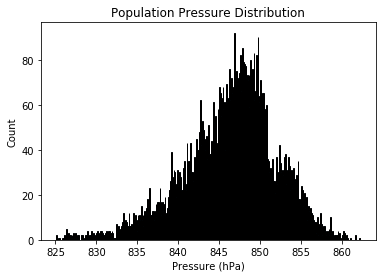

In [11]:
## plot the distribution of the population to check if it's normally distributed
binsize=0.1
min4hist=np.round(np.min(data['P_hPa']),1)-binsize
max4hist=np.round(np.max(data['P_hPa']),1)+binsize
nbins=int((max4hist-min4hist)/binsize)

plt.hist(data['P_hPa'],nbins,edgecolor='black')
plt.xlabel('Pressure (hPa)');
plt.ylabel('Count');
plt.title('Population Pressure Distribution');

In [4]:
### Bootstrap Nbs times to generate a distribution of randomly selected mean pressure.
Nbs=100000
## initialize array
P_Bootstrap=np.empty((Nbs,N_S))
## loop over to fill in array with randomly selected values
for ii in range(Nbs):
    P_Bootstrap[ii,:]=np.random.choice(data.P_hPa,N_S)

## Calculate the means of randomly selected values.
P_Bootstrap_mean=np.mean(P_Bootstrap,axis=1)
print(len(P_Bootstrap_mean))  ## check length to see if averaged across the correct axis

P_Bootstrap_mean_avg=np.mean(P_Bootstrap_mean)
print('Mean Average Pressure:',np.str(np.round(P_Bootstrap_mean_avg,2)))
P_Bootstrap_mean_std=np.std(P_Bootstrap_mean)
print('SD Mean Pressure:',np.str(np.round(P_Bootstrap_mean_std,2)))
P_Bootstrap_mean_min=np.min(P_Bootstrap_mean)
print('Min Mean Pressure:',np.str(np.round(P_Bootstrap_mean_min,2)))
P_Bootstrap_mean_max=np.max(P_Bootstrap_mean)
print('Max Mean Pressure:',np.str(np.round(P_Bootstrap_mean_max,2)))

100000
Mean Average Pressure: 846.33
SD Mean Pressure: 0.29
Min Mean Pressure: 845.08
Max Mean Pressure: 847.58


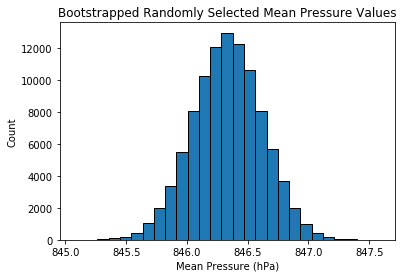

In [5]:
### Use matplotlib to plot a histogram of the bootstrapped to compare to the conditional pressure mean
binsize=0.1
min4hist=np.round(np.min(P_Bootstrap_mean),1)-binsize
max4hist=np.round(np.max(P_Bootstrap_mean),1)+binsize
nbins=int((max4hist-min4hist)/binsize)

plt.hist(P_Bootstrap_mean,nbins,edgecolor='black')
plt.xlabel('Mean Pressure (hPa)');
plt.ylabel('Count');
plt.title('Bootstrapped Randomly Selected Mean Pressure Values');

In [6]:
## find the probability that the mean pressure of rainy days is happened by chance in percentage
PbyChance=np.count_nonzero(P_Bootstrap_mean>=847.03)*2/Nbs*100
print('PbyChance Percentage:',np.str(np.round(PbyChance,2)))

PbyChance Percentage: 1.43


In [7]:
## use normal distribution to get the PbyChance
SampleMean=P_avg_rain
population_mean=np.mean(P_Bootstrap_mean)
population_std=np.std(P_Bootstrap_mean)
Z=(SampleMean-population_mean)/population_std
print('Z value:',np.str(np.round(Z,2)))
prob=(1-stats.norm.cdf(np.abs(Z)))*2*100 ##this is a two-sided test
print("Probability - two-tailed test (percent):",np.round(prob,2))

Z value: 2.43
Probability - two-tailed test (percent): 1.49


In [9]:
## t-test and z-test
# find the critical region for t-test
df=N_S-1
tstat95=stats.t.ppf(0.975,df)
print("95% confidence t:", np.round(tstat95,2))
# find the critical region for z-test
zstat95=stats.norm.ppf(0.975)
print("95% confidence z:", np.round(zstat95,2))

95% confidence t: 1.97
95% confidence z: 1.96


In [13]:
## calculate t value and z value
# z value
z_value=(P_avg_rain-P_avg)*np.sqrt(N_S)/P_std
print("z=",np.str(np.round(z_value,2)))
# t value
t_value=(P_avg_rain-P_avg)*np.sqrt(N_S-1)/S_std
print("t=",np.str(np.round(t_value,2)))

z= 2.44
t= 2.54
